# Gradient Boosting for Regression 

You are given $\left(x_1, y_1\right),\left(x_2, y_2\right), \ldots,\left(x_n, y_n\right)$, and the task is to fit a model $F(x)$ to minimize square loss.

Rule of the game:

- You are not allowed to remove anything from $F$ or change any parameter in $F$.
- You can add an additional model (regression tree) $h$ to $F$, so the new prediction will be $F(x)+h(x)$.

You wish to improve the model such that
$$
\begin{aligned}
& F\left(x_1\right)+h\left(x_1\right)=y_1 \\
& F\left(x_2\right)+h\left(x_2\right)=y_2 \\
& \cdots \\
& F\left(x_n\right)+h\left(x_n\right)=y_n
\end{aligned}
$$

Or, equivalently, you wish
$$
\begin{aligned}
& h\left(x_1\right)=y_1-F\left(x_1\right) \\
& h\left(x_2\right)=y_2-F\left(x_2\right) \\
& \cdots \\
& h\left(x_n\right)=y_n-F\left(x_n\right)
\end{aligned}
$$



**Can any regression tree $h$ achieve this goal perfectly?**

Maybe not....

But some regression tree might be able to do this approximately.
How?

Just fit a regression tree $h$ to data
$$
\left(x_1, y_1-F\left(x_1\right)\right),\left(x_2, y_2-F\left(x_2\right)\right), \ldots,\left(x_n, y_n-F\left(x_n\right)\right)
$$

> Congratulations, you get a better model!

* $y_i-F\left(x_i\right)$ are called residuals. These are the parts that existing model $F$ cannot do well.

* The role of $h$ is to compensate the shortcoming of existing model $F$.

* If the new model $F+h$ is still not satisfactory, we can add another regression tree...

* We are improving the predictions of training data, is the procedure also useful for test data?

* Yes! Because we are building a model, and the model can be applied to test data as well.

![](https://cdn.mathpix.com/snip/images/C9Dt1ZaOWwIR-aS7uD5SoYgjbRaMQgHGwTcV0iLUB8w.original.fullsize.png)

**How is this related to gradient descent?**

$$
\begin{aligned}
F\left(x_i\right) & :=F\left(x_i\right)+h\left(x_i\right) \\
F\left(x_i\right) & :=F\left(x_i\right)+y_i-F\left(x_i\right) \\
F\left(x_i\right) & :=F\left(x_i\right)-1 \frac{\partial J}{\partial F\left(x_i\right)} \\
\theta_i & :=\theta_i-\rho \frac{\partial J}{\partial \theta_i}
\end{aligned}
$$

**How is this related to gradient descent?**

Loss function $L(y, F(x))=(y-F(x))^2 / 2$

We want to minimize $J=\sum_i L\left(y_i, F\left(x_i\right)\right)$ by adjusting $F\left(x_1\right), F\left(x_2\right), \ldots, F\left(x_n\right)$.

Notice that $F\left(x_1\right), F\left(x_2\right), \ldots, F\left(x_n\right)$ are just some numbers. We can treat $F\left(x_i\right)$ as parameters and take derivatives
$$
\frac{\partial J}{\partial F\left(x_i\right)}=\frac{\partial \sum_i L\left(y_i, F\left(x_i\right)\right)}{\partial F\left(x_i\right)}=\frac{\partial L\left(y_i, F\left(x_i\right)\right)}{\partial F\left(x_i\right)}=F\left(x_i\right)-y_i
$$
So we can interpret residuals as negative gradients.
$$
y_i-F\left(x_i\right)=-\frac{\partial J}{\partial F\left(x_i\right)}
$$

**How is this related to gradient descent?**

$$
\begin{aligned}
F\left(x_i\right) & :=F\left(x_i\right)+h\left(x_i\right) \\
F\left(x_i\right) & :=F\left(x_i\right)+y_i-F\left(x_i\right) \\
F\left(x_i\right) & :=F\left(x_i\right)-1 \frac{\partial J}{\partial F\left(x_i\right)} \\
\theta_i & :=\theta_i-\rho \frac{\partial J}{\partial \theta_i}
\end{aligned}
$$

For regression with square loss,
$$
\text { residual } \Leftrightarrow \text { negative gradient }
$$
$$
\text{fit $h$ to residual $\Leftrightarrow$ fit $h$ to negative gradient }
$$
$$
\text{update $F$ based on residual $\Leftrightarrow$ update $F$ based on negative gradient}
$$

So we are actually updating our model using gradient descent! 

It turns out that the concept of gradients is more general and useful than the concept of residuals. 

So from now on, let's stick with gradients. 

# Regression with square Loss

Let us summarize the algorithm we just derived using the concept of gradients. 

Negative gradient:
$$
-g\left(x_i\right)=-\frac{\partial L\left(y_i, F\left(x_i\right)\right)}{\partial F\left(x_i\right)}=y_i-F\left(x_i\right)
$$
start with an initial model, say, $F(x)=\frac{\sum_{i=1}^n y_i}{n}$ iterate until converge:

* calculate negative gradients $-g\left(x_i\right)$

* fit a regression tree $h$ to negative gradients $-g\left(x_i\right)$

* $F:=F+\rho h$, where $\rho$ is the learning rate

The benefit of formulating this algorithm using gradients is that it allows us to consider other loss functions and derive the corresponding algorithms in the same way and use the theory to determine the optimum learning rate.

# Example

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# 1-D data set

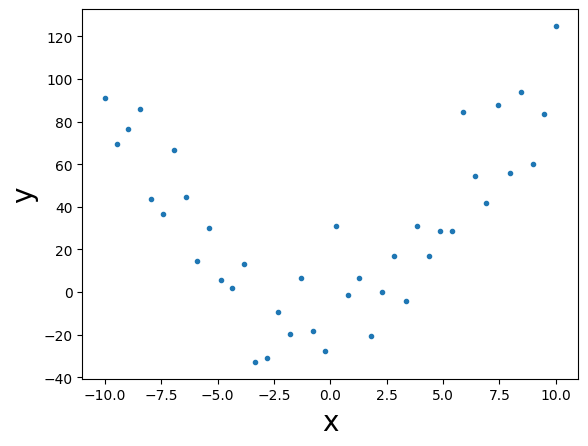

In [2]:

# No randomness

np.random.seed(42)

#Generate N points for training data

N = 40

# get 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, N)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 1 + np.random.normal(0,20,N)

def plotdata():
    fig, ax = plt.subplots()
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)
    ax.plot(x, y,'.')
    
plotdata()
plt.show()

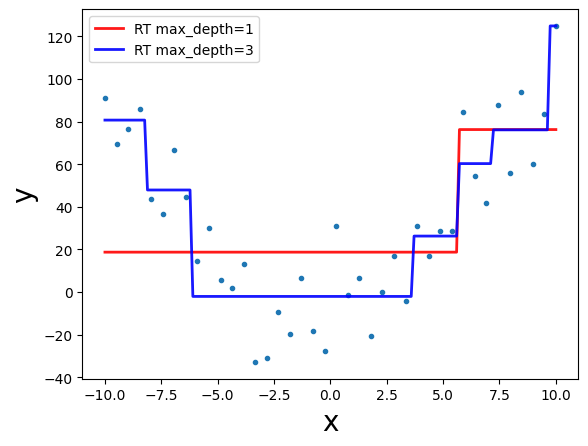

In [4]:
# Example of a simple regression tree (no boosting or gradient boosting)

#Reshape x: 
x_train = x[:, np.newaxis]
y_train = y[:, np.newaxis]

new_x = np.linspace(-10, 10, 4*N)

from sklearn.tree import DecisionTreeRegressor
plotdata()
DT = DecisionTreeRegressor(max_depth=1).fit(x_train, y_train) 
plt.plot(new_x, DT.predict(new_x[:, np.newaxis]),
         label='RT max_depth=1', color='r', alpha=0.9, linewidth=2)

DT = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train) 
plt.plot(new_x, DT.predict(new_x[:, np.newaxis]),
         label='RT max_depth=3', color='b', alpha=0.9, linewidth=2)

plt.legend(loc='upper left')
plt.show()

# Gradient Boosted Decision Trees¶

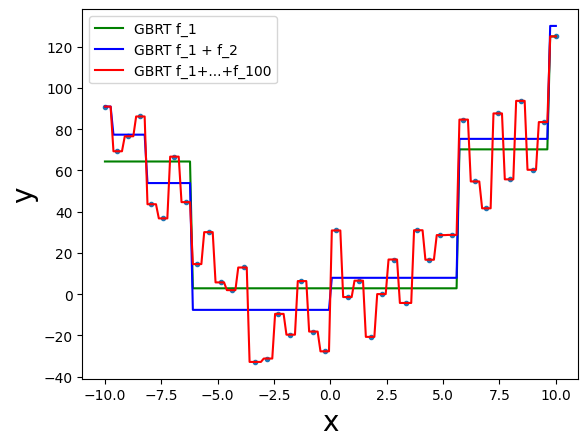

In [5]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor

plotdata()
DT = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=1.0)
DT.fit(x_train, y)

ax = plt.gca() 

# step through prediction as we add 10 more trees.
colorvector = ['g','b']
legendvector = ['f_1',"f_1 + f_2"]
i = 0
for pred in islice(DT.staged_predict(new_x[:, np.newaxis]), 0, 2, 1):
    plt.plot(new_x, pred, color=colorvector[i], alpha=1,label='GBRT '+legendvector[i])
    i += 1

pred = DT.predict(new_x[:, np.newaxis])
plt.plot(new_x, pred, color='r', label='GBRT f_1+...+f_'+str(DT.n_estimators))

plt.legend(loc='upper left')
plt.show()

\begin{exercise}
Repeat the above example with absolute error.
$$
L(y, F)=|y-F|
$$

Remember that absolute error is more robust to outliers.
\end{exercise}


# AdaBoost classifier  example

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


d:\app\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.88


In this example, the AdaBoost algorithm is used for classification. 

It uses decision trees (DecisionTreeClassifier) as the base estimator, and the number of estimators is set to 50. 

The synthetic dataset is generated using make_classification, and it is split into training and testing sets using train_test_split. 

The AdaBoost classifier is trained on the training set (X_train and y_train), and then predictions are made on the test set (X_test). 

Finally, the accuracy of the classifier is computed using accuracy_score.